In [345]:
!git init https://github.com/ahwali/gradproject.git

fatal: cannot mkdir https://github.com/ahwali/gradproject.git: Invalid argument


In [344]:
!git add COVID_dataset.ipynb
!git commit -m "updates"
!git push origin main

fatal: pathspec 'COVID_dataset.ipynb' did not match any files


On branch master

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Mental Health - Household Pulse Survey - COVID-19.mhtml
	nchs_covid_health_insurance_coverage.csv
	nchs_covid_indicators_of_anxiety_depression.csv
	nchs_covid_mental_health_care.csv
	nchs_covid_reduced_access_to_health_care.csv
	nchs_covid_telemedicine_usage.csv

nothing added to commit but untracked files present (use "git add" to track)


error: src refspec main does not match any
error: failed to push some refs to 'origin'


In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
pwd

'C:\\Users\\ahwal\\Desktop\\Classes\\DS200\\graduate project'

In [84]:
df_ins = pd.read_csv('nchs_covid_health_insurance_coverage.csv')
df_access = pd.read_csv('nchs_covid_reduced_access_to_health_care.csv')

In [88]:
df_access.columns.values

array(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period',
       'Time Period Label', 'Time Period Start Date',
       'Time Period End Date', 'Value', 'Low CI', 'High CI',
       'Confidence Interval', 'Quartile Range'], dtype=object)

In [106]:
df_access['Indicator'].unique()

array(['Delayed Medical Care, Last 4 Weeks',
       'Did Not Get Needed Care, Last 4 Weeks',
       'Delayed or Did Not Get Care, Last 4 Weeks'], dtype=object)

In [142]:
df_access = df_access.dropna(subset=['Value'])
df_access['Value'].isna().any()

False

In [143]:
df_access['Phase'].unique()

array(['1', '2', '3 (Oct 28 � Dec 21)', '3 (Jan 6 � Mar 29)', '3.1'],
      dtype=object)

In [144]:
df_access_Delayed = df_access[df_access['Indicator']=='Delayed Medical Care, Last 4 Weeks']
df_access_Didnot = df_access[df_access['Indicator']=='Did Not Get Needed Care, Last 4 Weeks']
df_access_Delayed_Didnot = df_access[df_access['Indicator']=='Delayed or Did Not Get Care, Last 4 Weeks']

In [195]:
pivot_Delayed = pd.pivot_table(df_access_Delayed, values='Value', index=['Indicator', 'Group', 'State', 'Subgroup'], columns=['Time Period'])

In [316]:
display(pivot_Delayed)

Time Period                                                                         1   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  34.8   
                                                                   30 - 39 years  37.3   
                                                                   40 - 49 years  40.3   
                                                                   50 - 59 years  40.7   
                                                                   60 - 69 years  42.1   
...                                                                                ...   
                                   By State          Washington    Washington     43.1   
                                                     West Virginia West Virginia  38.9   
                                                     Wisconsin     Wisconsin      38.7   
                                                     Wyoming       Wyoming        33.0   
                                   National Estimate United States United States  38.7   

Time Period                                                                         2   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  38.3   
                                                                   30 - 39 years  41.2   
                                                                   40 - 49 years  42.3   
                                                                   50 - 59 years  43.7   
                                                                   60 - 69 years  40.2   
...                                                                                ...   
                                   By State          Washington    Washington     44.9   
                                                     West Virginia West Virginia  42.3   
                                                     Wisconsin     Wisconsin      40.4   
                                                     Wyoming       Wyoming        42.9   
                                   National Estimate United States United States  41.1   

Time Period                                                                         3   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  36.6   
                                                                   30 - 39 years  40.4   
                                                                   40 - 49 years  41.9   
                                                                   50 - 59 years  44.0   
                                                                   60 - 69 years  42.7   
...                                                                                ...   
                                   By State          Washington    Washington     43.7   
                                                     West Virginia West Virginia  31.2   
                                                     Wisconsin     Wisconsin      39.2   
                                                     Wyoming       Wyoming        46.4   
                                   National Estimate United States United States  40.7   

Time Period                                                                         4   \
Indicator                          Group             State         Subgroup              
Delayed Medical Care, Last 4 Weeks By Age            United States 18 - 29 years  34.0   
                                                                   30 - 39 years  39.9   
                                                                   40 - 49 years  42.6   
                                     

In [213]:
Time_period_dict = {}
for i in df_access_Delayed[df_access_Delayed.State=='California']['Time Period'].values:
    Time_period_dict[i] = f"{df_access_Delayed[df_access_Delayed.State=='California']['Time Period Start Date'].values[i-1]}-{df_access_Delayed[df_access_Delayed.State=='California']['Time Period End Date'].values[i-1]}"

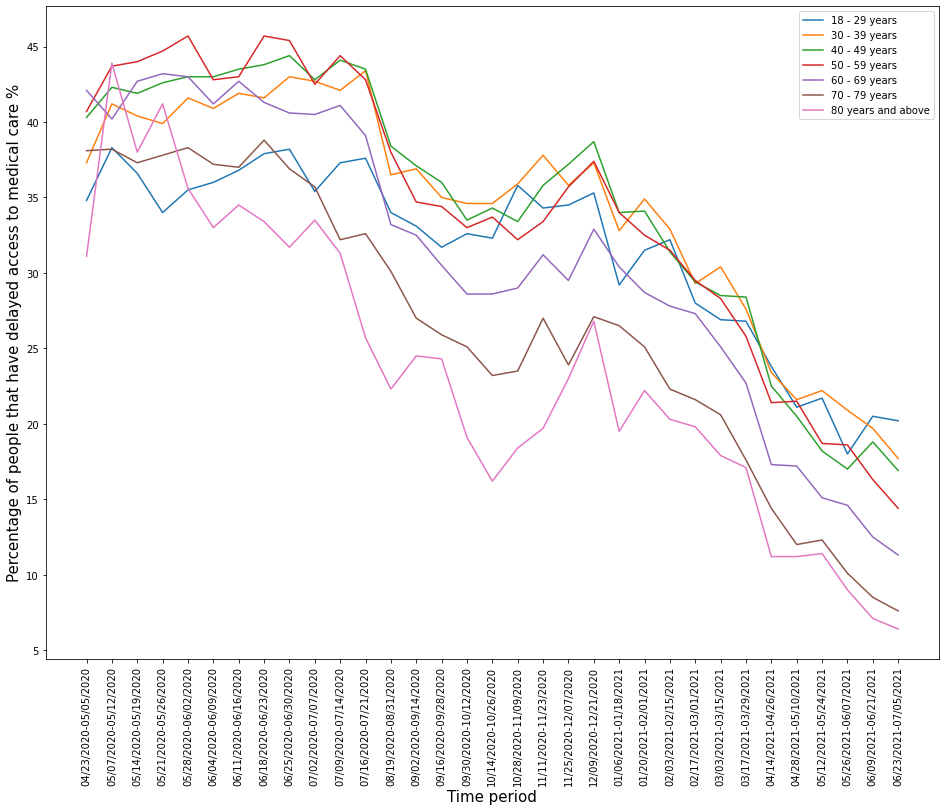

In [315]:
plt.figure(figsize=(16,12))
for i in range(0,7):
    sns.lineplot(x=Time_period_dict.values(), y=pivot_Delayed.iloc[i,:], label=pivot_Delayed.iloc[i].name[3])
    plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Time period', fontsize = 15)
plt.ylabel('Percentage of people that have delayed access to medical care %', fontsize = 15)
plt.show()

In [252]:
States = df_access_Delayed.State.unique()
States

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [278]:
Groups = df_access_Delayed.Group.unique()
Groups

array(['National Estimate', 'By Age', 'By Sex',
       'By Race/Hispanic ethnicity', 'By Education', 'By State',
       'By Disability status'], dtype=object)

In [285]:
Subgroups = df_access_Delayed[df_access_Delayed.Group=='By Race/Hispanic ethnicity'].Subgroup.unique()
Subgroups

array(['Hispanic or Latino', 'Non-Hispanic White, single race',
       'Non-Hispanic Black, single race',
       'Non-Hispanic Asian, single race',
       'Non-Hispanic, other races and multiple races'], dtype=object)

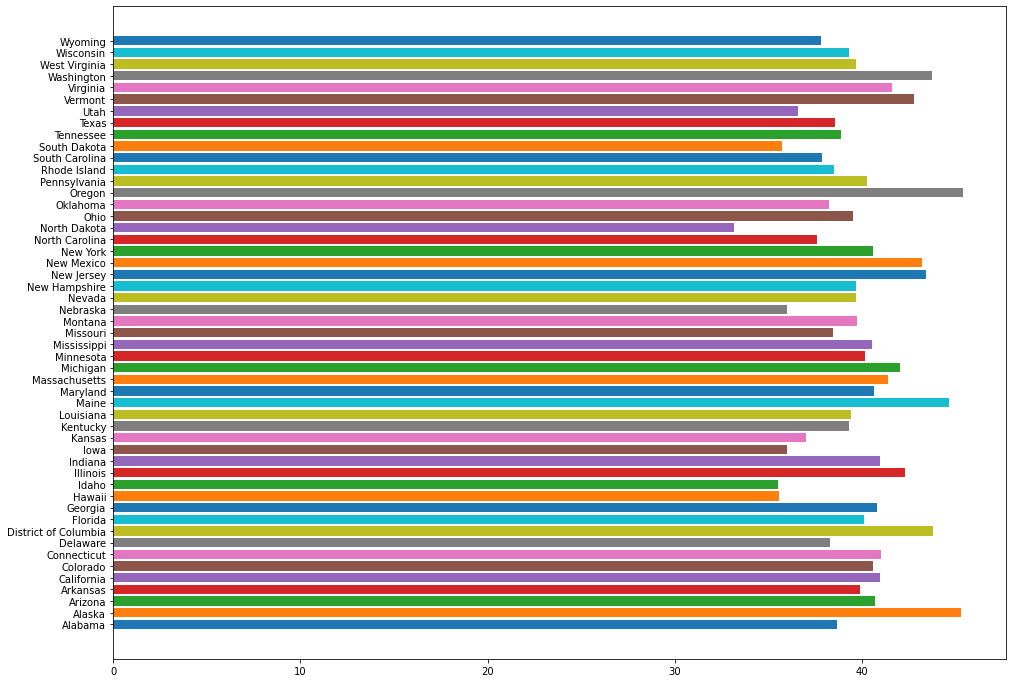

In [319]:
plt.figure(figsize=(16,12))
for state in States[1:]:
    plt.barh(y=state, width=np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]))
plt.show()

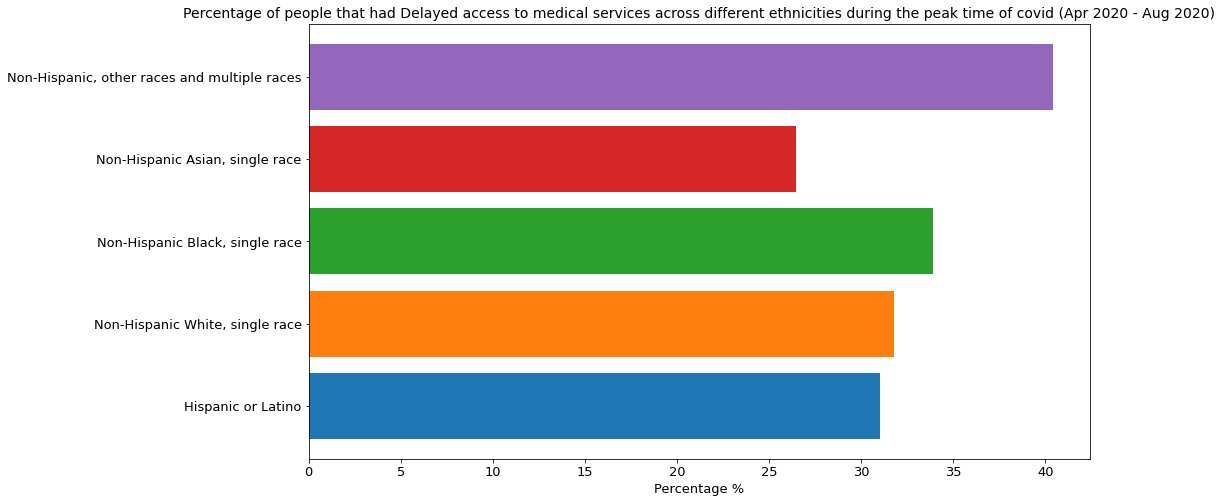

In [338]:
plt.figure(figsize=(14,8))
for sub in Subgroups:
    plt.barh(y=sub, width=np.mean(df_access_Didnot[df_access_Didnot['Subgroup']==sub]['Value'][:13]))
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel('Percentage %', fontsize=13)
plt.title('Percentage of people that had Delayed access to medical services across different ethnicities during the peak time of covid (Apr 2020 - Aug 2020)', fontsize=14)
plt.show()

In [327]:
minim = 45
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) < minim:
        minim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_min = state
maxim = 0
for state in States[1:]:
    if np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13]) > maxim:
        maxim = np.mean(df_access_Delayed[df_access_Delayed['State']==state]['Value'][:13])
        state_max = state

print(state_min)
print(state_max)

North Dakota
Oregon


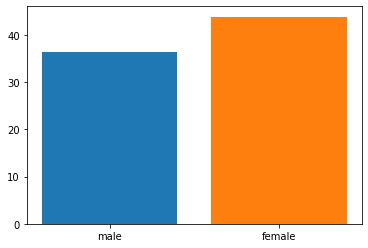

In [329]:
plt.bar(x = 'male', height=np.mean(df_access_Delayed[df_access_Delayed.Subgroup == 'Male']['Value'][:13]))
plt.bar(x = 'female', height=np.mean(df_access_Delayed[df_access_Delayed.Subgroup == 'Female']['Value'][:13]))
plt.show()

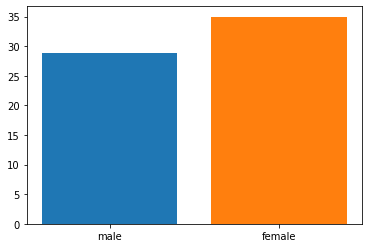

In [330]:
plt.bar(x = 'male', height=np.mean(df_access_Didnot[df_access_Didnot.Subgroup == 'Male']['Value'][:13]))
plt.bar(x = 'female', height=np.mean(df_access_Didnot[df_access_Didnot.Subgroup == 'Female']['Value'][:13]))
plt.show()